# Auto-labeller (Otsu)

In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# # Random image
# img = cv2.imread('data/pictures/05.08.22/thermal/0b2b93c22bd01ac28d8624e0abbc582d-2.jpg',0)

In [3]:
# # # global thresholding
# ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# # Otsu's thresholding
# ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# # Otsu's thresholding after Gaussian filtering
# blur = cv2.GaussianBlur(img,(5,5),0)
# ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# # plot all the images and their histograms
# images = [img, 0, th1,
#           img, 0, th2,
#           blur, 0, th3]
# titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
#           'Original Noisy Image','Histogram',"Otsu's Thresholding",
#           'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
# plt.figure(num=1, figsize=(20,20), dpi=80)
# for i in range(3):
#     plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
#     plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
#     plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
#     plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
#     plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
#     plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
# plt.show()

In [4]:
# # Generate intermediate image; use morphological closing to keep parts of the cow together
# inter = cv2.morphologyEx(th3, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
#
# # Find largest contour in intermediate image
# cnts, _ = cv2.findContours(inter, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# cnts = sorted(cnts, key=lambda x: cv2.contourArea(x), reverse=True)
# cnt = cnts[0]
# cnt2 = cnts[1]
#
# # Output
# out = np.zeros(img.shape, np.uint8)
# cv2.drawContours(out, [cnt, cnt2], -1, 255, cv2.FILLED)
# out = cv2.bitwise_and(img, out)
#
# # Draw bounding boxes for 2 largest contours
# x,y,w,h = cv2.boundingRect(cnt)
# cv2.rectangle(out,(x,y),(x+w,y+h),(255,255,255),2)
# x,y,w,h = cv2.boundingRect(cnt2)
# cv2.rectangle(out,(x,y),(x+w,y+h),(255,255,255),2)
#
# # Show original image, Otsu binary image, and 2 largest areas of foreground
# plt.figure(num=1, figsize=(20,20))
# plt.subplot(1,3,1),plt.imshow(img,'gray')
# plt.subplot(1,3,2),plt.imshow(inter,'gray')
# plt.subplot(1,3,3),plt.imshow(out,'gray')
# plt.show()

Q?-14-_2021_Wed_123309_|
"_ee
.jpg
w:720 h:1280


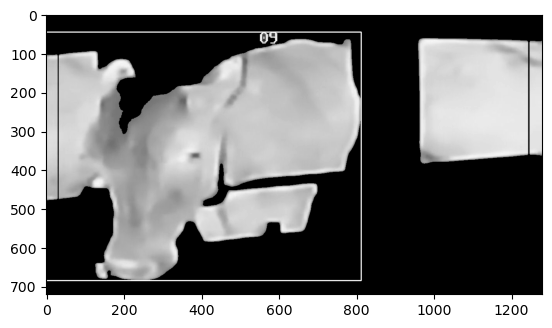

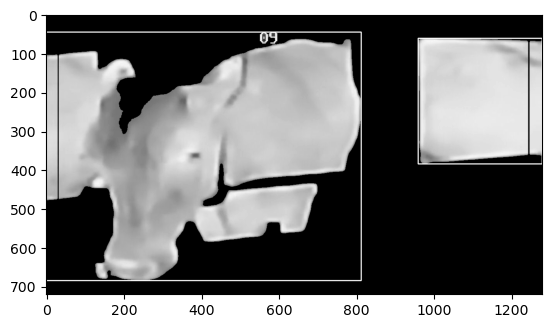

de_bet_O21_Wed_123308
—_-_a
.jpg
w:720 h:1280


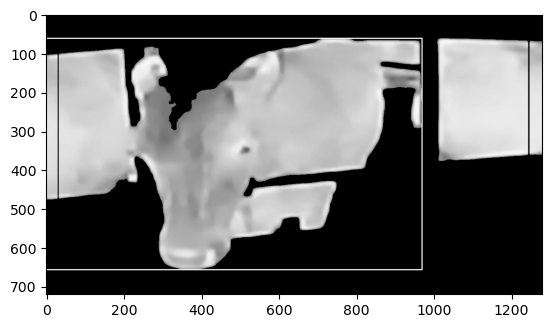

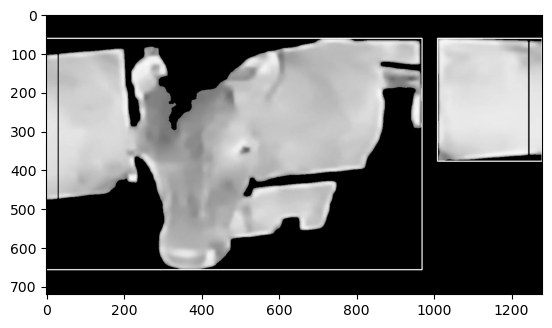

07-14-2021_Wed_123316_rN
.jpg
w:720 h:1280


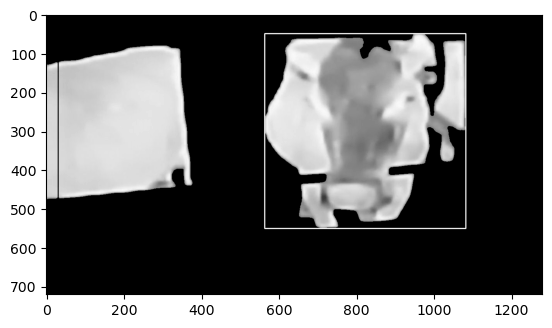

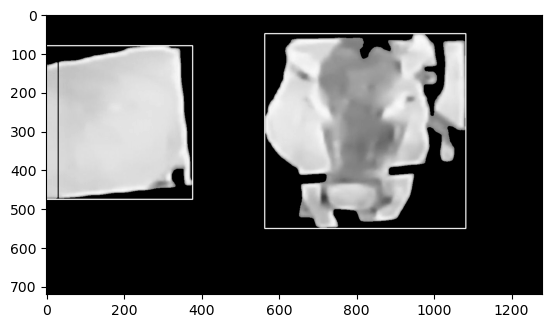

O?-14-2021_“_i_a
.jpg
w:720 h:1280


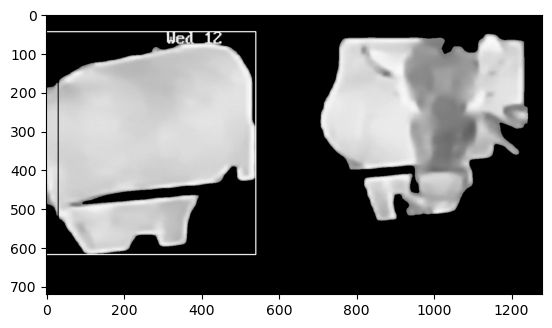

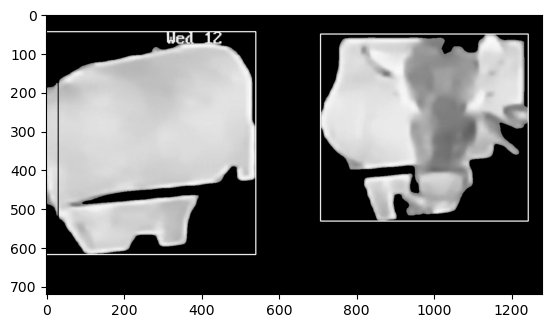

O?-14-_2021_Wed_12_‘oft._oy
—__|
.jpg
w:720 h:1280


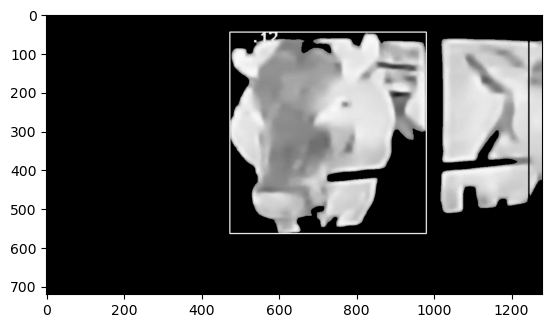

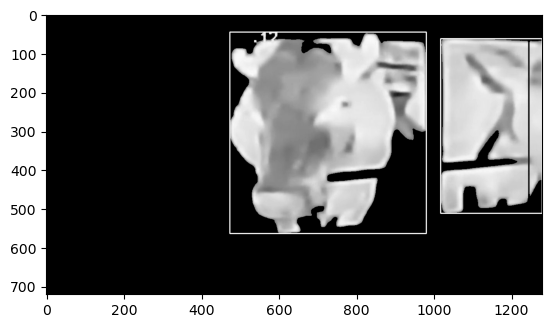

“3_14-_2021_Wed_12_a_1!
.jpg
w:720 h:1280


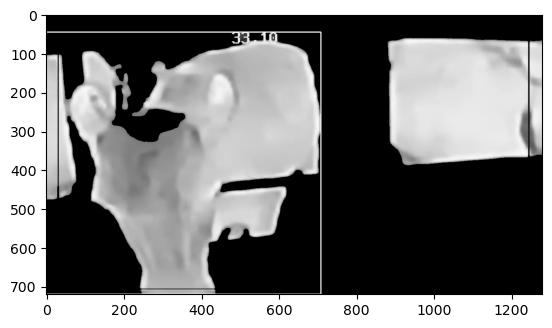

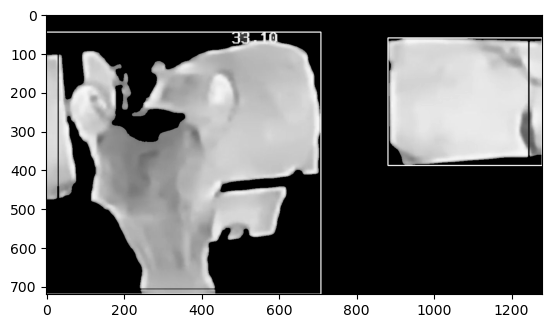

07-14-2021_Wed_ma_"od_wd
a_+
-
.jpg
w:720 h:1280


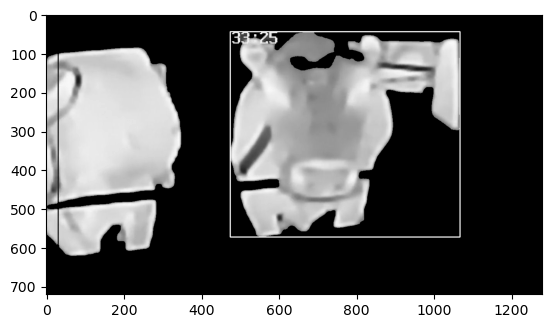

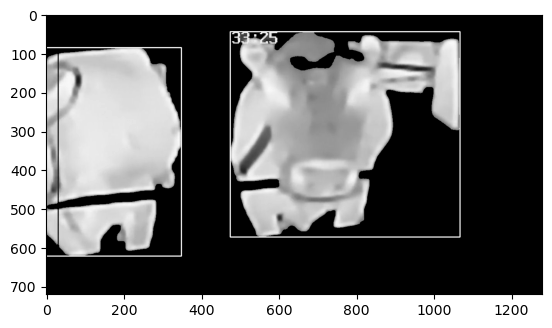

192.168.88.175_02_20210714123321747.jpg
w:720 h:1280


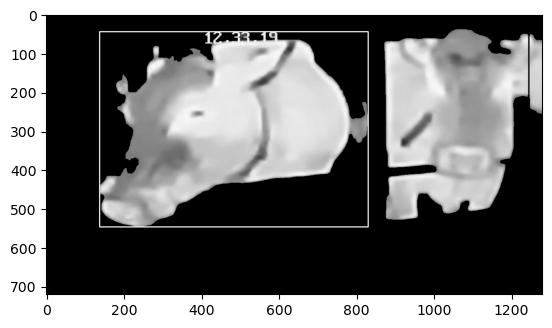

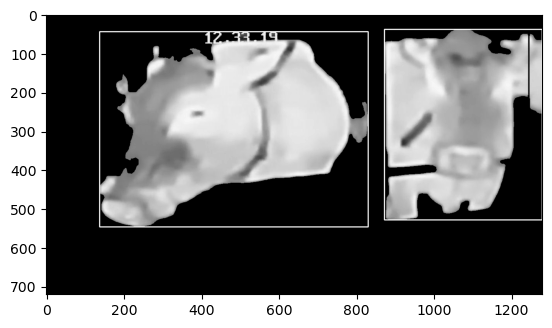

192.168.88.175_02_20210714123328993.jpg
w:720 h:1280


Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


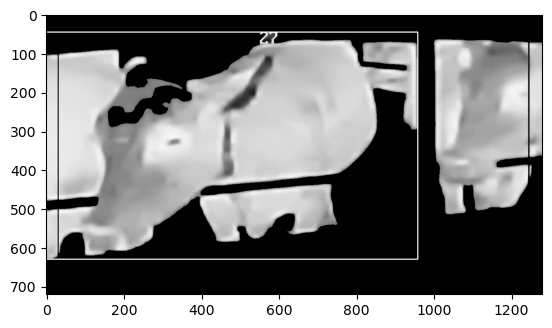

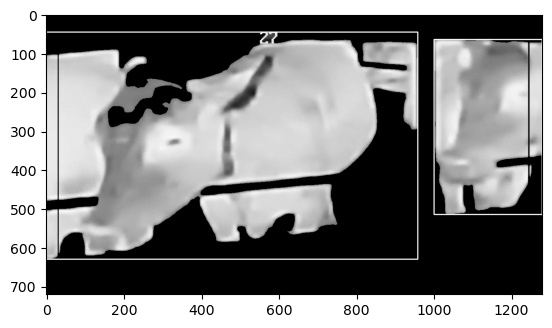

192.168.88.175_02_20210714123327929.jpg
w:720 h:1280


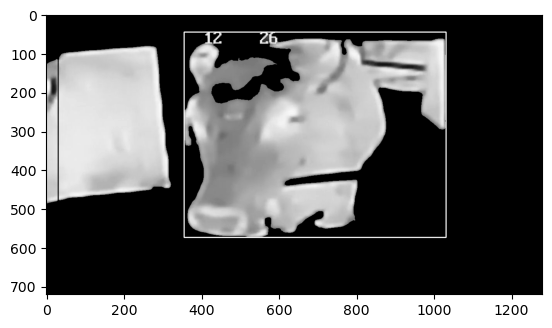

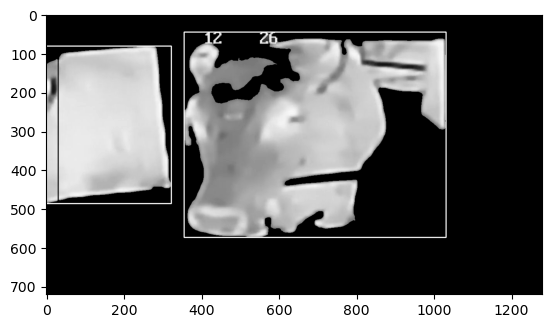

192.168.88.175_02_20210714123323768.jpg
w:720 h:1280


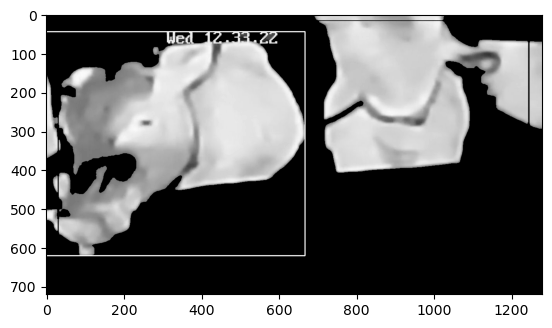

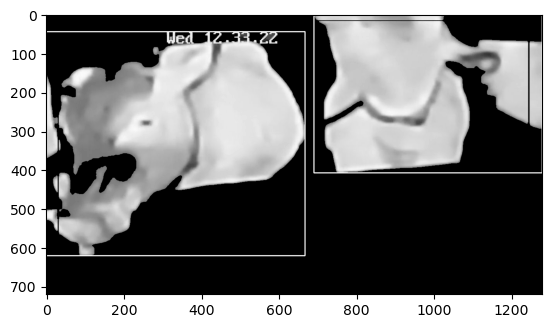

192.168.88.175_02_20210714123309966.jpg
w:720 h:1280


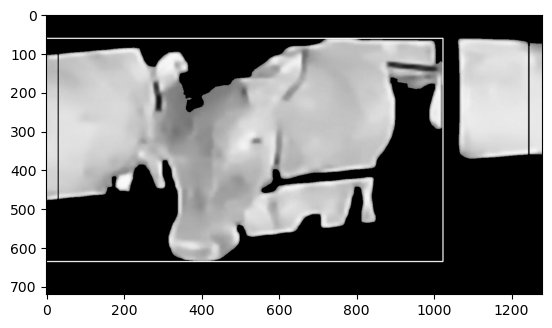

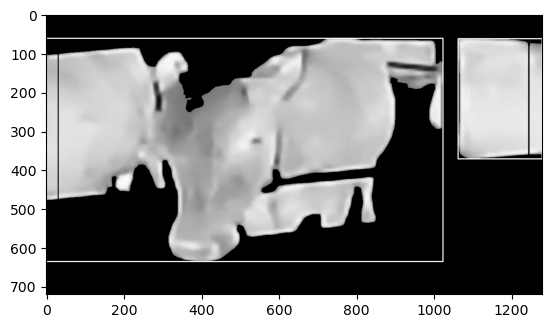

192.168.88.175_02_20210714123328567.jpg
w:720 h:1280


Corrupt JPEG data: 2 extraneous bytes before marker 0xd9


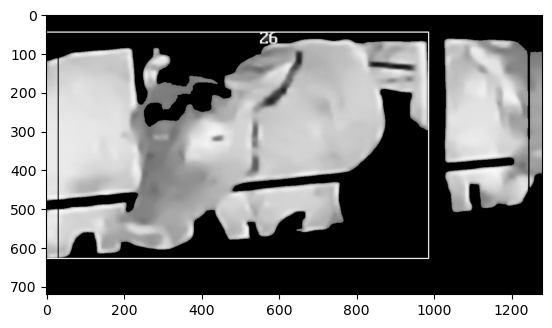

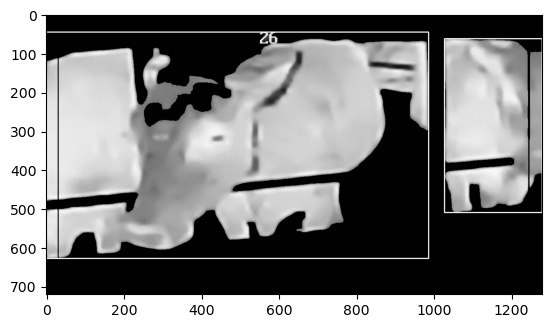

07-14-2021_We_eid_30
—__[|
.jpg
w:720 h:1280


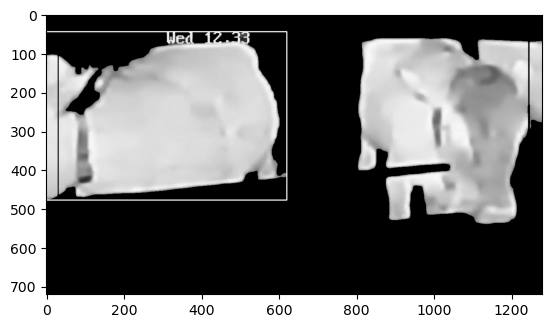

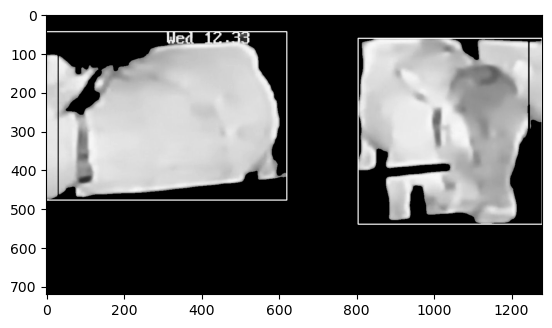

192.168.88.175_02_20210714123320850.jpg
w:720 h:1280


Corrupt JPEG data: 2 extraneous bytes before marker 0xd9


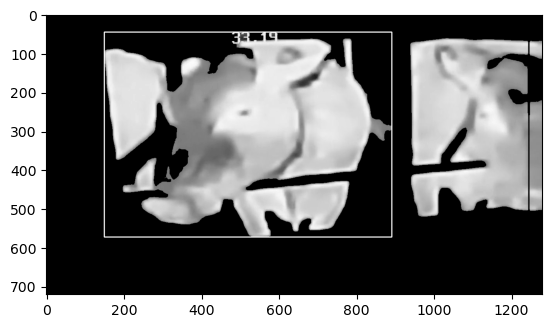

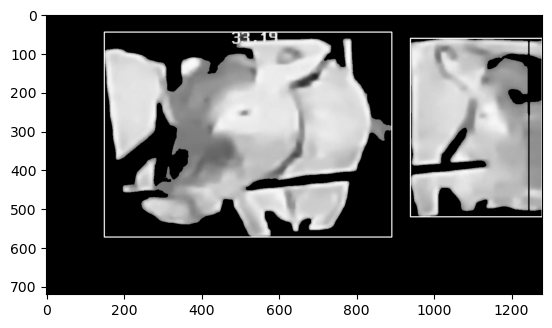

192.168.88.175_02_20210714123331785.jpg
w:720 h:1280


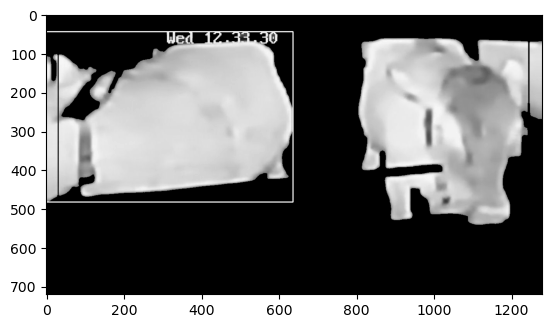

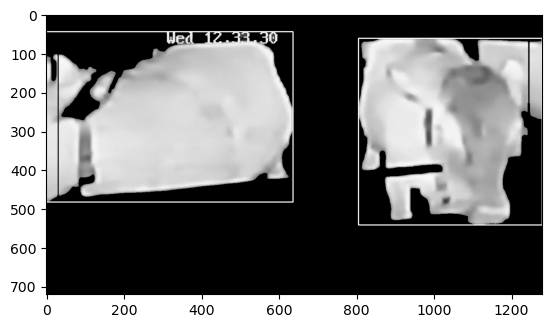

__
.jpg
w:720 h:1280


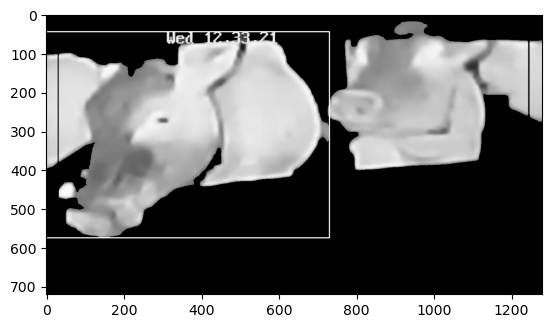

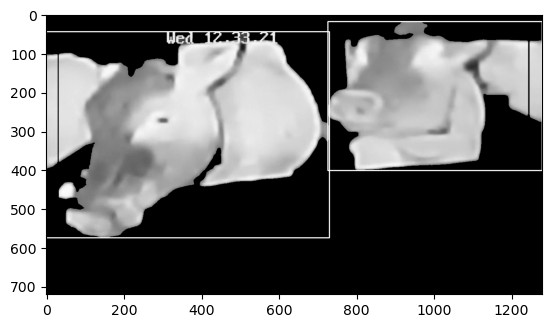

In [5]:
for filename in os.listdir('data/pictures/clean thermal'):
    print(filename)
    img = cv2.imread(f'data/pictures/clean thermal/{filename}', 0)
    img_width = img.shape[0]
    img_height = img.shape[1]
    print(f'w:{img_width} h:{img_height}')

    blur = cv2.GaussianBlur(img,(5,5),0)
    ret,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # Generate intermediate image; use morphological closing to keep parts of the cow together
    inter = cv2.morphologyEx(th, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))

    # Find 2 largest contours in intermediate image
    cnts, _ = cv2.findContours(inter, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    cnts = sorted(cnts, key=lambda c: cv2.contourArea(c), reverse=True)
    cnts = cnts[:2]

    # Output
    out = np.zeros(img.shape, np.uint8)
    cv2.drawContours(out, cnts, -1, 255, cv2.FILLED)
    out = cv2.bitwise_and(img, out)

    with open(filename + '.txt', 'w') as text_file:
        for cnt in cnts:
            x,y,w,h = cv2.boundingRect(cnt)
            cv2.rectangle(out,(x,y),(x+w,y+h),(255,255,255),2)
            # text_file.write(f'0 {x} {y} {w} {h}')
            plt.imshow(out, 'gray')
            plt.show()

